In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.000210523684764536 0.005160091115494809 0.1361031518624642 ... 0 0 0]
 [0.06578947122576177 0.013897588526412541 0.14469914040114612 ... 0 0 0]
 [0.005263155277008304 0.010694145453587434 0.11891117478510028 ... 0 1 0]
 ...
 [0.05263157645429362 0.859810398981424 0.1346704871060172 ... 0 0 0]
 [0.000988368423653601 0.005792679656356735 0.1017191977077364 ... 1 0 0]
 [0.17105262939750693 0.057828596847734885 0.13753581661891118 ... 0 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


# SVM Non-Linear

In [ ]:
import time
start = time.process_time()
# your code here    
print(time.process_time() - start)

In [3]:
# gammaValues = ['scale','auto',0.1,1,5,10]

In [4]:
%%time 
coef0Values = list(range(-200,200,50))
tuned_parameters = [{'kernel': ['rbf','sigmoid'], 'C': [0.1,1,10,100,1000],'gamma': [1e-4,1e-3,1e-2,0.1,1,5,10], 'coef0': coef0Values}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

CPU times: user 21min 53s, sys: 3.45 s, total: 21min 56s
Wall time: 21min 56s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'coef0': [-200, -150, -100, -50, 0, 50, 100, 150],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],
                          'kernel': ['rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

Best parameters set found on development set:
 {'C': 1000, 'coef0': -200, 'gamma': 10, 'kernel': 'rbf'}

 Best Score 0.6515703285969595

 Grid scores on development set:
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.0001, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.001, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.349 (+/-0.003) for {'C': 0.1, 'coef0': -200, 'gamma': 0.01, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.483 (+/-0.023) for {'C': 0.1, 'coef0': -200, 'gamma': 0.1, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.483 (+/-0.017) for {'C': 0.1, 'coef0': -200, 'gamma': 1, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 1, 'kernel': 'sigmoid'}
0.498 (+/-0.014) for {


Testing score:  0.6349263763239331

Training Score:  0.6742336236216199


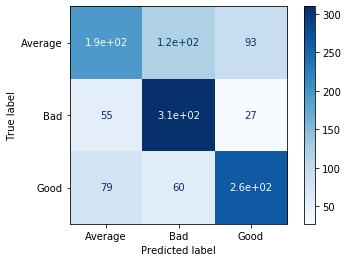

In [5]:
print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)
    

In [6]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [ ]:
#start 15:57

In [7]:
%%time
scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring, verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 27.9min remaining: 41.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 27.9min remaining: 18.6min


CPU times: user 125 ms, sys: 68.1 ms, total: 193 ms
Wall time: 28min 6s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 28.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 28.1min finished


In [8]:
print("-------------------------------------")
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

-------------------------------------
['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.63552008 0.64209731 0.67830702 0.67074373 0.64998928]


### K best Data

In [9]:
#Load Kbest data
arr2= np.load('data_kBest.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


In [10]:
%%time 
coef0Values = list(range(-200,200,50))
tuned_parameters = [{'kernel': ['rbf','sigmoid'], 'C': [0.1,1,10,100,1000],'gamma': [1e-4,1e-3,1e-2,0.1,1,5,10], 'coef0': coef0Values}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

CPU times: user 15min 41s, sys: 4.34 s, total: 15min 46s
Wall time: 15min 46s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'coef0': [-200, -150, -100, -50, 0, 50, 100, 150],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],
                          'kernel': ['rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

Best parameters set found on development set:
 {'C': 0.1, 'coef0': -200, 'gamma': 0.1, 'kernel': 'rbf'}

 Best Score 0.48374355403164804

 Grid scores on development set:
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.0001, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.001, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.349 (+/-0.003) for {'C': 0.1, 'coef0': -200, 'gamma': 0.01, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.484 (+/-0.017) for {'C': 0.1, 'coef0': -200, 'gamma': 0.1, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.469 (+/-0.020) for {'C': 0.1, 'coef0': -200, 'gamma': 1, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 1, 'kernel': 'sigmoid'}
0.469 (+/-0.020) for 


Testing score:  0.4834800514442011

Training Score:  0.48378596908345406


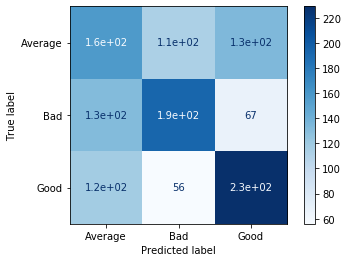

In [11]:
print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [ ]:
#start time 16:47

In [12]:
%%time
scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring, verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 23.5min remaining: 35.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 23.6min remaining: 15.7min


CPU times: user 150 ms, sys: 84.1 ms, total: 234 ms
Wall time: 23min 38s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 23.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 23.6min finished


In [13]:
print("-------------------------------------")
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

-------------------------------------
['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.48835152 0.48004522 0.48040023 0.47720038 0.49125204]


### K select Percentile

In [15]:
#Load Kbest data
arr2= np.load('data_select_percentile.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.000210523684764536 0.005160091115494809 0.1361031518624642 0 0]
 [0.06578947122576177 0.013897588526412541 0.14469914040114612 0 0]
 [0.005263155277008304 0.010694145453587434 0.11891117478510028 0 1]
 ...
 [0.05263157645429362 0.859810398981424 0.1346704871060172 0 0]
 [0.000988368423653601 0.005792679656356735 0.1017191977077364 1 0]
 [0.17105262939750693 0.057828596847734885 0.13753581661891118 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


In [16]:
%%time 
coef0Values = list(range(-200,200,50))
tuned_parameters = [{'kernel': ['rbf','sigmoid'], 'C': [0.1,1,10,100,1000],'gamma': [1e-4,1e-3,1e-2,0.1,1,5,10], 'coef0': coef0Values}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_macro', n_jobs=-1)
clf.fit(X_train, y_train)

CPU times: user 13.6 s, sys: 425 ms, total: 14 s
Wall time: 4min 1s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'coef0': [-200, -150, -100, -50, 0, 50, 100, 150],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],
                          'kernel': ['rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

Best parameters set found on development set:
 {'C': 1000, 'coef0': -200, 'gamma': 10, 'kernel': 'rbf'}

 Best Score 0.6447799074063426

 Grid scores on development set:
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.0001, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.001, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.349 (+/-0.003) for {'C': 0.1, 'coef0': -200, 'gamma': 0.01, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.441 (+/-0.011) for {'C': 0.1, 'coef0': -200, 'gamma': 0.1, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.460 (+/-0.035) for {'C': 0.1, 'coef0': -200, 'gamma': 1, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 1, 'kernel': 'sigmoid'}
0.503 (+/-0.015) for {


Testing score:  0.6211821891553632

Training Score:  0.6624896467838116


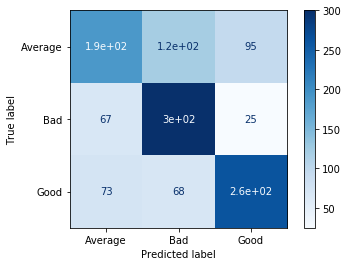

In [17]:
print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [ ]:
#start time 17:30

In [18]:
%%time
scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring, verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 19.0min remaining: 28.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 19.0min remaining: 12.7min


CPU times: user 101 ms, sys: 76.1 ms, total: 177 ms
Wall time: 19min 3s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 19.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 19.1min finished


In [19]:
print("-------------------------------------")
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

-------------------------------------
['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.64059005 0.62690832 0.64787799 0.6567087  0.63584766]


### PCA

In [20]:
#Load Kbest data
arr2= np.load('data_pca.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[-0.45579826472607415 0.7046019793738675 -0.28825772682504214
  -0.10797909629417606]
 [-0.45821755567357747 -0.7059423617884181 -0.2916635351593642
  -0.09416709513907746]
 [-0.21141491550725078 -0.0031579275616275076 0.8725130077194068
  -0.3905247495057231]
 ...
 [-0.4581169085501422 0.717465384690377 -0.2917362036100829
  -0.07432632961038373]
 [0.751538661872047 -0.0025887537747943763 -0.10000450010468652
  -0.05167456137188623]
 [-0.4595648294413432 0.7112979984399956 -0.2918739685292939
  -0.09370938251503302]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


In [21]:
%%time 
coef0Values = list(range(-200,200,50))
tuned_parameters = [{'kernel': ['rbf','sigmoid'], 'C': [0.1,1,10,100,1000],'gamma': [1e-4,1e-3,1e-2,0.1,1,5,10], 'coef0': coef0Values}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1_macro', n_jobs=-1)
clf.fit(X_train, y_train)

CPU times: user 12.2 s, sys: 389 ms, total: 12.6 s
Wall time: 3min 47s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'coef0': [-200, -150, -100, -50, 0, 50, 100, 150],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],
                          'kernel': ['rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

Best parameters set found on development set:
 {'C': 1000, 'coef0': -200, 'gamma': 10, 'kernel': 'rbf'}

 Best Score 0.5394537919113552

 Grid scores on development set:
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.0001, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.001, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.349 (+/-0.003) for {'C': 0.1, 'coef0': -200, 'gamma': 0.01, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.482 (+/-0.017) for {'C': 0.1, 'coef0': -200, 'gamma': 0.1, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.469 (+/-0.020) for {'C': 0.1, 'coef0': -200, 'gamma': 1, 'kernel': 'rbf'}
0.167 (+/-0.000) for {'C': 0.1, 'coef0': -200, 'gamma': 1, 'kernel': 'sigmoid'}
0.469 (+/-0.020) for {


Testing score:  0.553002156133315

Training Score:  0.5467324568367685


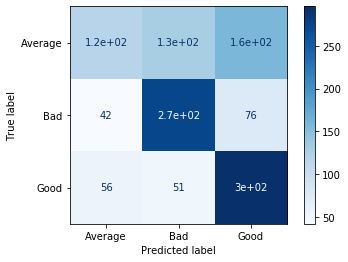

In [22]:
print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [ ]:
#start time 18:00

In [23]:
%%time
scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring, verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 18.7min remaining: 28.1min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 18.7min remaining: 12.5min


CPU times: user 96.9 ms, sys: 76.2 ms, total: 173 ms
Wall time: 18min 44s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 18.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 18.7min finished


In [24]:
print("-------------------------------------")
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

-------------------------------------
['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.54383843 0.52648442 0.5593726  0.52726141 0.55443945]
